In [52]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [53]:
print(math.e)

2.718281828459045


In [54]:
def sigmoid(z) :
    return 1./(1.+math.e ** -z)
    
print(sigmoid(-10))  # 0에 가까운
print(sigmoid(0))    # 0.5
print(sigmoid(10))   # 무한대에 가까운

4.539786870243442e-05
0.5
0.9999546021312976


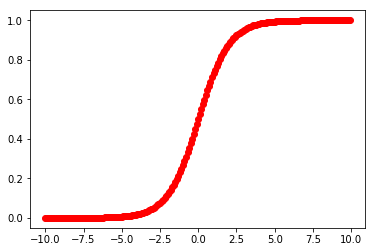

In [55]:
for i in range(-100, 100):
    z = i/10   # z= wx+b
    s = sigmoid(z)
    plt.plot(z, s, 'ro')
plt.show()

In [56]:
def A():
    return 'A'
def B():
    return 'B'
y = 1
print(y*A()+(1-y)*B())

A


In [57]:
data = [[828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998]]
np.shape(data)

(8, 5)

In [58]:
data = np.transpose(data)
print(np.shape(data))

(5, 8)


In [59]:
print(data[:-1])

[[8.28659973e+02 8.23020020e+02 8.19929993e+02 8.16000000e+02
  8.19359985e+02 8.19000000e+02 8.11700012e+02 8.09510010e+02]
 [8.33450012e+02 8.28070007e+02 8.24400024e+02 8.20958984e+02
  8.23000000e+02 8.23000000e+02 8.15250000e+02 8.16659973e+02]
 [9.08100000e+05 1.82810000e+06 1.43810000e+06 1.00810000e+06
  1.18810000e+06 1.19810000e+06 1.09810000e+06 1.39810000e+06]
 [8.28349976e+02 8.21655029e+02 8.18979980e+02 8.15489990e+02
  8.18469971e+02 8.16000000e+02 8.09780029e+02 8.04539978e+02]]


In [60]:
x= data[:-1].transpose().astype(np.float32)
y= data[-1:].transpose().astype(np.float32)
print(x.shape)
print(y.shape)

(8, 4)
(8, 1)


In [61]:
w = tf.Variable(tf.random_uniform([4,1], -1, 1))
b = tf.Variable(tf.random_uniform([1], -1, 1))
hf = tf.matmul(x,w) + b
lr = 0.000001
cost = tf.reduce_mean(tf.square(hf-y))
optimizer =  tf.train.GradientDescentOptimizer(learning_rate=lr)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(201):
    sess.run(train)
    if i % 20 == 0 :
        print(i, sess.run(cost))

0 1.8059087e+25
20 nan
40 nan
60 nan
80 nan
100 nan
120 nan
140 nan
160 nan
180 nan
200 nan


* * *

In [51]:
data = [[828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998]]

def min_max_scaler(data) : # 정규화 수행
    print(np.min(data)) # data 전체 최소값
    print(np.max(data)) # data 전체 최대값
    print("="*50)
    print(np.max(data, axis = 0)) # 열고정
    print(np.max(data, axis = 0))
    min = np.max(data, axis = 0)
    max = np.max(data, axis = 0)
    return (data - min)/(max -min)    #data를 정규화한 결과 리턴



804.539978
1828100.0
[8.28659973e+02 8.33450012e+02 1.82810000e+06 8.28349976e+02
 8.31659973e+02]
[8.28659973e+02 8.33450012e+02 1.82810000e+06 8.28349976e+02
 8.31659973e+02]
None
